In [7]:
def data_read_display(data): #data is already in nu
    """ 
	when passed the full filename (path plus filename) of a deep learning dataset
	This function reads the binary data and rescales it
	reforms it from vector into array of the proper size
	rails the data off at suggested maximum and minimum values
	displays the data as grayscale on black background
    """

    import numpy as np
    import matplotlib.pyplot as plt

    dims = (126,201)   # rows, columns

    minmax = [0,30]	# suggested data limits for display purposes
    
    # set minmax = [0,0] to use minimum and maximum of each file (excluding missing data)
    # [0,30] mm/hr is a good range for rainfall

    #data = np.array(filename) # 2 byte integers
    #print('size of read vector',len(data))
    data = np.reshape(data,dims)
    #print(data.shape)
    if (np.max(data) > 0):

        # scale data to between 0 and 1 then rail off the extremes
        if (minmax[0] > 0 or minmax[1] > 0):
            data[(data < minmax[0])] = minmax[0]
            data[(data > minmax[1])] = minmax[1]
            data = (data - minmax[0])/(minmax[1] - minmax[0])
        else:
            data = (data - np.min(data))/(np.max(data) - np.min(data))

    else:
        print('empty hour!')

    # display image as grayscale
    plt.ion()  # needed if running from command line
    plt.imshow(data, cmap='Paired', origin='lower')


In [8]:
def get_average_values(directoryname):
    import os
    import numpy as np
    '''
    for data in os.listdir(directoryname):   
        #print(data)
        the_data = np.fromfile(directoryname+data,dtype='int16',count=-1,sep='')
        
        print(the_data, the_data.shape)
    print(list(map(np.fromfile(directoryname+data,dtype='int16',count=-1,sep=''), )))
    '''
    #print(directoryname)
    #list(map(os.listdir, directoryname))
    data = os.listdir(directoryname)
    #print(data)
    #print(directoryname+data[0])
    #data_list = list(map(np.fromfile(directoryname+,dtype='int16',count=-1,sep=''), data))
    data_list = [np.fromfile(directoryname+d,dtype='int16',count=-1,sep='') for d in data]
    #test = []
    #test.append([1,2,3])
    #test.append([4,5,6])    
    count = len(data_list)
    test_list = list(map(sum, zip(*data_list)))
    new_list = list(map(lambda x:x/count, test_list))
    return new_list
'''
def slow_get_average_values(directoryname):
    import os
    import numpy as np
    list_len = len(np.fromfile(directoryname+os.listdir(directoryname)[0],dtype='int16',count=-1,sep=''))
    output_list = [0] * list_len
    for data in os.listdir(directoryname):
        d = (np.fromfile(directoryname+data,dtype='int16',count=-1,sep=''))
        for i in range(len(d)):
            output_list += d[i]
    for i in range(len(output_list)):
        output_list[i] = output_list[i]/list_len
    return output_list
'''
def average_data(directoryname):
    import os
    import numpy as np
    list_len = len(np.fromfile(directoryname+os.listdir(directoryname)[0],dtype='int16',count=-1,sep=''))
    output_list = np.zeros(list_len)#[0] * list_len
    for data in os.listdir(directoryname):
        d = (np.fromfile(directoryname+data,dtype='int16',count=-1,sep=''))
        output_list=output_list + d
    #print(output_list)
    return output_list/list_len

radar.2017.12


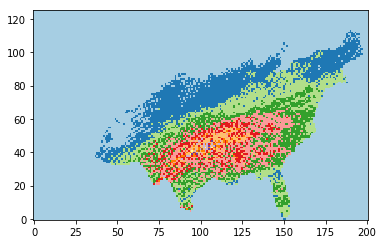

In [29]:
import numpy as np
#data = np.fromfile("/home/yuan/Documents/Spring-2018/Senior Design/Weather/radar-data/radar.2008.06/radar.20080601.00.dat",dtype='int16',count=-1,sep='') # 2 byte integers
#data_read_display(data)
test = average_data("/home/yuan/Documents/Spring-2018/Senior Design/Weather/radar-data/radar.2017.12/")
#print(len(test))
#print(type(test))
print("radar.2017.12")
data_read_display(test)